In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import re

%matplotlib notebook

In [2]:
# Load all data from folder
import os

# Location of files
folder = 'price/'
tail = '.csv'
filenames = os.listdir(folder)
    
# Get the supplied coin name
coins = list(map(lambda x: re.sub(tail, '', x).upper(), filenames))

# Load data
df_list = []
for filename in filenames:
    df_list.append(pd.read_csv(folder + filename, delimiter='\t', index_col='Date'))
    # input(filename + ' loaded.\nEnter to proceed')    # Debug for file read errors.


# Clear up each list
for index, df in enumerate(df_list):
    # Drop all columns except Date and Market Cap 
    df = df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1)
    # Convert Date column datatype to Date
    df.index = pd.to_datetime(df.index)    
    
    # Convert Market Cap column datatype to numeric
    df['Market Cap'] = df['Market Cap'].str.replace(',', '')    # Remove commas
    df = df[df['Market Cap'].str.contains('-') == False]        # Delete missing data
    df['Market Cap'] = pd.to_numeric(df['Market Cap'])
    
    # Replace previous dataframe
    df_list[index] = df 
    

In [3]:
# Print df info
for index, df in enumerate(df_list):
    print('[' + str(index) + '] Ticker: ' + coins[index])
    df.info()
    print('--'*25)
    print(df.head())
    print('><'*25)

[0] Ticker: BCH
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 133 entries, 2017-12-12 to 2017-08-02
Data columns (total 1 columns):
Market Cap    133 non-null int64
dtypes: int64(1)
memory usage: 2.1 KB
--------------------------------------------------
             Market Cap
Date                   
2017-12-12  24051800000
2017-12-11  22239900000
2017-12-10  23784900000
2017-12-09  24671600000
2017-12-08  22386700000
><><><><><><><><><><><><><><><><><><><><><><><><><
[1] Ticker: BTC
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1690 entries, 2017-12-12 to 2013-04-28
Data columns (total 1 columns):
Market Cap    1690 non-null int64
dtypes: int64(1)
memory usage: 26.4 KB
--------------------------------------------------
              Market Cap
Date                    
2017-12-12  283155000000
2017-12-11  258147000000
2017-12-10  253782000000
2017-12-09  276415000000
2017-12-08  297787000000
><><><><><><><><><><><><><><><><><><><><><><><><><
[2] Ticker: DASH
<class 'panda

In [52]:
len_list = [len(df) for df in df_list]
coin_index = len_list.index(max(len_list))    # Find index of coin with oldest data

# Create new data frame with coins as columns
cc_df = pd.DataFrame([], columns=coins, index=df_list[coin_index].index)
for i in range(0, len(len_list)):
    cc_df[coins[i]] = df_list[i]['Market Cap']
    
cc_df.head()

,BCH,BTC,DASH,ETH,IOTA,LTC,XEM,XMR,XRP
Date,,,,,,,,,
2017-12-12,2.405180e+10,283155000000,5.934340e+09,5.028640e+10,1.185290e+10,11528600000,4.458080e+09,4.348820e+09,9.772240e+09
2017-12-11,2.223990e+10,258147000000,5.333190e+09,4.238930e+10,1.151290e+10,8042020000,3.545280e+09,3.784310e+09,9.164670e+09
2017-12-10,2.378490e+10,253782000000,5.600430e+09,4.550140e+10,1.294640e+10,8438840000,4.002320e+09,4.061590e+09,9.512330e+09
2017-12-09,2.467160e+10,276415000000,5.633100e+09,4.400560e+10,1.402960e+10,6910360000,6.157700e+09,4.283550e+09,9.768540e+09
2017-12-08,2.238670e+10,297787000000,5.423040e+09,4.184580e+10,1.151280e+10,5327910000,2.115340e+09,4.346000e+09,8.663460e+09


In [53]:
# Group by group_period
group_period = '7D'
cc_df = cc_df.resample(group_period).mean()

In [54]:
# Load total market cap data
market_cap_df = pd.read_csv('data/total_market_cap.csv', index_col='Date', parse_dates=True)

# Add total market cap to cc_df as Total
#cc_df['Total'] = market_cap_df['Total Market Cap']

cc_df.head()

,BCH,BTC,DASH,ETH,IOTA,LTC,XEM,XMR,XRP
Date,,,,,,,,,
2013-04-28,NaN,1.384919e+09,NaN,NaN,NaN,6.781151e+07,NaN,NaN,NaN
2013-05-05,NaN,1.262736e+09,NaN,NaN,NaN,5.974981e+07,NaN,NaN,NaN
2013-05-12,NaN,1.300063e+09,NaN,NaN,NaN,5.482550e+07,NaN,NaN,NaN
2013-05-19,NaN,1.395911e+09,NaN,NaN,NaN,5.704303e+07,NaN,NaN,NaN
2013-05-26,NaN,1.464011e+09,NaN,NaN,NaN,5.554451e+07,NaN,NaN,NaN


In [56]:
market_cap_df.head()

,Total Market Cap
Date,
2013-04-28,1596170359
2013-05-05,1341783003
2013-05-12,1367920068
2013-05-19,1448321940
2013-05-26,1548982054


In [63]:
# Convert coin market cap to percentage of total market cap ### FIX ###
ccp_df = cc_df.divide(market_cap_df, axis=0)
ccp_df.tail()

,BCH,BTC,DASH,ETH,IOTA,LTC,Total Market Cap,XEM,XMR,XRP
Date,,,,,,,,,,
2017-11-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# Plot data for Dec 2017, 0th row      ## TODO SEVEN DAYS ##
from matplotlib.dates import *

row_data = cc_df.iloc[0][coins]
row_date = row_data.name.strftime('%b-%Y')

ax = sns.barplot(coins, row_data)
#plt.title('Market Cap')
#plt.show()

In [ ]:
from matplotlib.dates import DateFormatter

ax = cc_df.plot(x=cc_df.index, y=coins, kind='bar', figsize=(8,4))
plt.ylabel('Market Cap')
plt.xlabel('Date')

drange = pd.date_range(min(cc_df.index), max(cc_df.index) + pd.offsets.MonthEnd(), freq='M')
ax.get_xaxis().set_ticks(drange)
ax.get_xaxis().set_major_formatter(DateFormatter('%Y-%b'))
ax.xaxis_date()
ax.autoscale()
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [33]:
# Plot Benford's Law
def benfords_prob(d):
    return np.log10(1+1/d)

benfords_10 = [benfords_prob(i) for i in range(1, 11)]

<IPython.core.display.Javascript object>


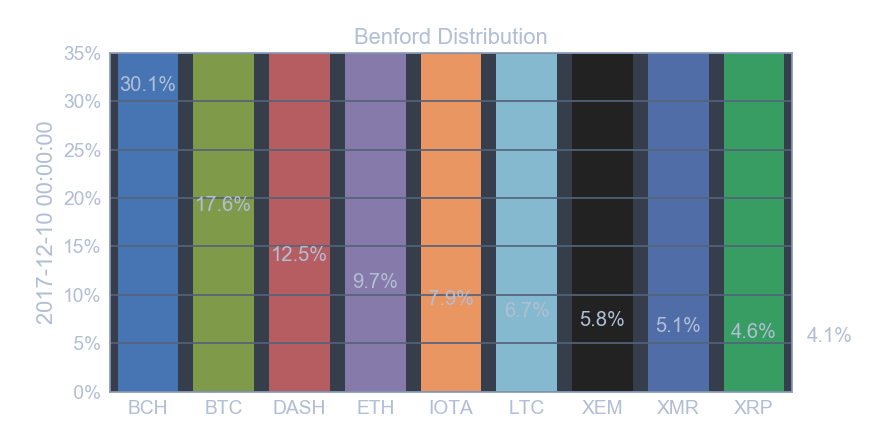

In [34]:
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot([x for x in range(1,11)], benfords_10, palette='Blues_r')

# Add percentage text to top of bar
for r in ax.patches:
    height = r.get_height()
    ax.text(r.get_x()+r.get_width()/2.,    # x-pos of text
            height + 0.01,                 # y-pos of text
            '{:3.1f}%'.format(height*100), # text string
            ha="center") 
    
# Change y limits and display as percentages
ax.set_ylim(0, 0.35)  
vals = ax.get_yticks()
ax.set_yticklabels(['{:2.0f}%'.format(x*100) for x in vals])
ax.autoscale_view()

plt.title('Benford Distribution')
plt.show()